In [1]:
from funman import funman

from pysmt.typing import INT, REAL, BOOL
from pysmt.shortcuts import get_model, And, Or, Symbol, Real, GT, LE, GE, Equals, Plus, Times, Minus
import os


%load_ext autoreload
%autoreload 2

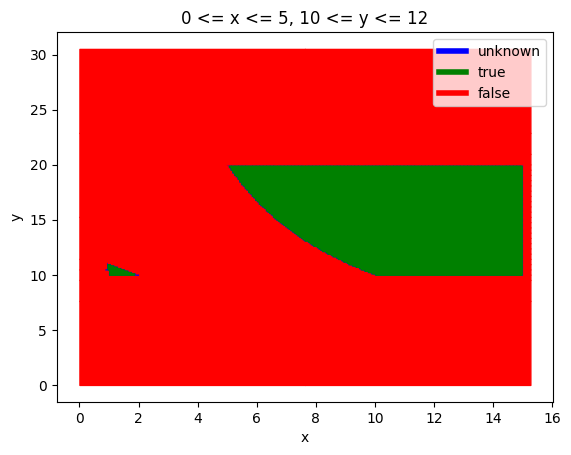

In [2]:
x = Symbol("x", REAL)
y = Symbol("y", REAL)
parameters = [funman.Parameter(x), funman.Parameter(y)]

# 0.0 < x < 5.0, 10.0 < y < 12.0
model = funman.Model(
    Or(
        And(
            LE(x, Real(5.0)), 
            GE(x, Real(0.0)),
            LE(y, Real(12.0)), 
            GE(y, Real(10.0)),
            LE(Plus(x, y), Real(12.0)),
            GE(Times(x, y), Real(10.0))
            ),
        And(
            LE(x, Real(15.0)), 
            GE(x, Real(5.0)),
            LE(y, Real(20.0)), 
            GE(y, Real(10.0)),
            LE(Minus(x, y), Real(10.0)),
            GE(Times(x, y), Real(100.0))
            )
        )
    )

scenario = funman.ParameterSynthesisScenario(parameters, model)
fm = funman.Funman()
result = fm.solve(scenario)